# Matens utsläpp - Grupparbete i flera delar (2, 3)

### Innehåll
* [Del 1: Val av produkter och transportens inverkan](#osa2.1)
* [Del 2: Utsläppens fördelning](#osa2.2)

## Grupp 2 och 3 <a class="anchor" id="ryhmat23"></a>

I diskussionen kring klimatförändring och hushåll finns det en fråga som gång på gång dyker upp: Vilken inverkan har matens ursprung på de utsläpp som orsakas av vår näring? Hur mycket skiljer sig t.ex. utsläppen som orsakas av ett paket lokalproducerat nötkött och en mexikansk avocado? Härifrån börjar vår forskning!

Er uppgift är att bekanta er med den första gruppens rapport. Därifrån bör ni få den data och information som behövs för att ni ska kunna skapa era egna diagram. Därefter får ni bekanta er med den givna filen 'food-emissions-supply-chain.csv', som innehåller en lista på en del livsmedel och de utsläpp som kommer av dem.

Välj ett livsmedel (Grupp 2 kan välja ett vegetariskt och grupp 3 en köttprodukt), som ni undersöker närmare genom att jämföra t.ex. transportformens inverkan på produktens totalutsläpp, då produkten fraktas från de städer som grupp 1 valt till Helsingfors. Slutligen ska ni lämna in en rapport som innehåller de diagram som behövs, inklusive tillhörande förklaringar, och svar på frågorna nedan.

###  Del 1: Val av produkt och transportens inverkan <a class="anchor" id="osa2.1"></a>

In [7]:
# Eleverna börjar med att läsa in rätt funktionspaket.
# Vi läser in den givna csv-filen som variabeln livsmedel.

livsmedel = pd.read_csv('https://raw.githubusercontent.com/opendata-education/Maantiede/main/materiaali/data/food-emissions-supply-chain.csv')

In [8]:
# Denna cell visar oss hela csv-filens tabell.

pd.set_option("max_rows", None)
livsmedel

,Ruoka-aine,Koodi,Vuosi,Paastot maankaytosta,Paastot maanviljelysta,Paastot elaimen ruoasta,Paastot ruoan prosessoinnista,Paastot kuljetuksesta,Paastot jakelusta,Paastot pakkauksesta
0,Omenat,NaN,2018,0.0,0.2,0.0,0.0,0.1,0.0,0.0
1,Banaanit,NaN,2018,0.0,0.3,0.0,0.1,0.3,0.0,0.1
2,Ohra,NaN,2018,0.0,0.2,0.0,0.1,0.0,0.3,0.5
3,Nauta (lihakarja),NaN,2018,16.3,39.4,1.9,1.3,0.3,0.2,0.2
4,Nauta (maitotuotteet),NaN,2018,0.9,15.7,2.5,1.1,0.4,0.2,0.3
5,Sokerijuurikkaan sokeri,NaN,2018,0.0,0.5,0.0,0.2,0.6,0.0,0.1
6,Marjat ja rypaleet,NaN,2018,0.0,0.7,0.0,0.0,0.2,0.0,0.2
7,Kaalit,NaN,2018,0.0,0.3,0.0,0.0,0.1,0.0,0.0
8,Ruokosokeri,NaN,2018,1.2,0.5,0.0,0.0,0.8,0.0,0.1
9,Maniokki,NaN,2018,0.6,0.2,0.0,0.0,0.1,0.0,0.0


Nu när ni kan undersöka tabellens innehåll är det dags att välja ett intressant livsmedel att ta en närmare titt på. Därefter beräknar vi produktens CO2-utsläpp utan transportens inverkan, och sedan transportens andel av totalutsläppen.

Enheten som anges i tabellerna är kgCO2eq.

Exempel: Om CO2-utsläppen utan transportberäkning är 5 kgCO$_2$eq per kilogram, och frakt med tåg är 0.05 kgCO$_2$eq per ton och kilometer, så blir utsläppen för en produkt som fraktas 50 km totalt 5 kgCO$_2$eq + 0.05 kgCO$_2$eq  * 50 (km) / 1000 (kg) = 5.0025 kgCO$_2$eq per kilogram.


In [9]:
# Vi ska skapa en tabell som innehåller informationen om er utvalda livsmedelsprodukt, olika startstäder,
# transportsträckans längd och utsläpp vid olika transportmetoder. Ni kan börja med att köra den här cellen
# direkt utan att göra ändringar, så ser ni hur tabellen utformas innan ni börjar fylla i den.


info = {'Livsmedel' : ['x', 'x', 'x', 
                                    ],  
        'Startstad' : ['Stad 1', 'Stad 2', 'Stad 3'],  
        'Avstånd till Helsingfors' : ['avstånd', 'avstånd', 'avstånd'], 
        'Utsläpp 1 (enhet)' : ['tal 1.1', 'tal 1.2', 'tal 1.3'],
        'Utsläpp 2 (enhet)' : ['tal 2.1', 'tal 2.2', 'tal 2.3'],
        'Utsläpp 3 (enhet)' : ['tal 3.1', 'tal 3.2', 'tal 3.3'],
        'Utsläpp 4 (enhet)' : ['tal 4.1', 'tal 4.2', 'tal 4.3'],}

tabell = pd.DataFrame(info)
display(tabell)

,Livsmedel,Startstad,Avstånd till Helsingfors,Utsläpp 1 (enhet),Utsläpp 2 (enhet),Utsläpp 3 (enhet),Utsläpp 4 (enhet)
0,x,Stad 1,avstånd,tal 1.1,tal 2.1,tal 3.1,tal 4.1
1,x,Stad 2,avstånd,tal 1.2,tal 2.2,tal 3.2,tal 4.2
2,x,Stad 3,avstånd,tal 1.3,tal 2.3,tal 3.3,tal 4.3


Lägg märke till att utsläppen i livsmedelstabellen är beräknade per kilogram livsmedel, medan transportutsläppen är angivna per ton. Varför? När passar det bättre att räkna med kilogram och när passar det bättre att räkna i ton? Varför orsakar olika livsmedel olika stora transportutsläpp?

Här mäter vi utsläpp per massaenhet, men vilka andra storheter kunde vi använda när vi jämför utsläpp?

Fundera på hur era beräknade utsläpp stämmer överens med de som finns angivna i tabellen. Är det något av era resultat som stämmer överens med det angivna värdet? Vilken transportmetod används för maten i fråga? Varför? Hur viktig är transportutsläppens andel när man beräknar matens totalutsläpp?

### Del 2: Utsläppens fördelning <a class="anchor" id="osa2.2"></a>

Vi undersöker också utsläppens indelning enligt tabellen vi läste in i början.

In [12]:
# I den här cellen skapar vi de listor som behövs för att vi ska kunna
# visa hur utsläppen för vårt valda livsmedel är fördelade.


kategorier = livsmedel.columns # i 'kategorier'-variabeln sparar vi kolumnnamnen ur filen 'food-emissions-supply-chain.csv'
kategorier = kategorier[3:10] # Inom klamrarna kan vi välja vilka kolumner vi vill använda.
                              # [3:10] betyder 3 till 9, eftersom Python exkluderar den övre gränsen.
                              # t.ex. kolumn 3 = päästöt maankäytöstä osv.

print(kategorier) # Vi skriver ut listan för att kontrollera att vi fick med de rätta kolumnerna.

COvarden = livsmedel.loc[10] # Vi skapar en variabel för listan med livsmedlets utsläpp.
                            # Siffran inom klamrarna ska bytas ut mot ert valda livsmedels index. (omenat = 0, banaanit = 1...)

COvarden = COvarden[3:10] # Här väljer vi ut de värden ur listan som matchar våra valda kolumner.
print(COvarden)           # Vi skriver ut listan för att kontrollera att vi har valt rätt  värden.


summa = sum(COvarden) # Vi beräknar summan av alla värden för att använda den senare i koden.

andel = [i / summa for i in COvarden] # Vi beräknar varje värdes andel av matens totalutsläpp.

print(andel) # Vi skriver ut de beräknade andelarna av utsläppen.


Index(['Paastot maankaytosta', 'Paastot maanviljelysta',
       'Paastot elaimen ruoasta', 'Paastot ruoan prosessoinnista',
       'Paastot kuljetuksesta', 'Paastot jakelusta', 'Paastot pakkauksesta'],
      dtype='object')
Paastot maankaytosta              4.5
Paastot maanviljelysta           13.1
Paastot elaimen ruoasta           2.3
Paastot ruoan prosessoinnista     0.7
Paastot kuljetuksesta             0.1
Paastot jakelusta                 0.3
Paastot pakkauksesta              0.2
Name: 10, dtype: object
[0.2122641509433962, 0.6179245283018867, 0.10849056603773582, 0.033018867924528295, 0.0047169811320754715, 0.014150943396226412, 0.009433962264150943]


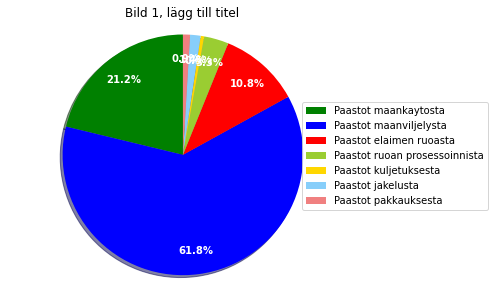

In [14]:
# Vi skapar ett diagram som avbildar de olika utsläppsområdenas andel av produktens totalutsläpp.

labels = kategorier
sizes = andel

colors = ['green','blue','red','yellowgreen', 'gold', 'lightskyblue', 'lightcoral'] # Vi väljer färger för diagrammet.

# Följande stycke är en kod som skapar ett cirkeldiagram.
patches, texts, pcts = plt.pie(sizes, colors=colors, autopct='%.1f%%', pctdistance=0.8, shadow=True, startangle=90)
plt.legend(patches, labels, bbox_to_anchor=(1.15,0.5), loc="center right", bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0, bottom=0.1, right=1)
plt.gca().axis("equal")
plt.setp(pcts, color='white', fontweight='bold')
plt.tight_layout()


plt.title ("Bild 1, lägg till titel") # Lägg till en passande rubrik till diagrammet. Vad avbildas här?

plt.show()

Fint! Nu har vi all grafik som hör till rapporten. Till sist behöver ni skriva rapporten. Den bör innehålla:

1. Diagrammen, med tydliga förklaringar och bildtexter.
1. Era observationer från graferna.
1. Svar på frågorna nedan
1. Kontaktuppgifter till er grupp i det fall att nästa grupp har följdfrågor.

Det är viktigt att skriva en noggrann rapport, så att nästa grupp får tillräckligt med information om ert arbete, kort och koncist. Gå alltså noga igenom er rapport själva, och tänk på vilka frågor som kan dyka upp när följande grupp läser den. Var förutseende, och svara på de potentiella frågorna innan de hinner ställas.

Frågor:
1. Varifrån kommer informationen i tabellerna och diagrammen?
1. Fundera på vad era diagram berättar. Hurudana tankar väcker de?
1. Hur är det med er valda livsmedelsprodukt? Var det något av era beräknade utsläppsvärden som träffade värdet i tabellen? Har transportmedlet en betydande inverkan på livsmedlets helhetsutsläpp? Hur stor inverkan har produktens ursprungsland? Vilka produktionsskeden påverkar produktens utsläpp?
1. Uppskatta hur tillförlitliga era beräkningar är. Verkar något av era resultat felaktigt? Kan ni motivera era resultat?
1. När är det mer praktiskt att ange utsläppen i kilogram, och när i ton? Hur kommer det sig att olika livsmedels transport orsakar olika stora utsläpp?